In [ ]:
import xupy as xp
from ekarus.e2e.utils.image_utils import get_circular_mask
import matplotlib.pyplot as plt

from arte.utils.radial_profile import computeRadialProfile


[XuPy] Device 0 available - GPU : `NVIDIA GeForce RTX 4060 Laptop GPU`
       Memory = 7805.56 MB | Compute Capability = 8.9
       Using CuPy 13.5.1 for acceleration.


In [ ]:
def spatial_frequency(screenSize):
    a = xp.tile(xp.fft.fftfreq(screenSize, d=1. / screenSize), (screenSize, 1))
    return xp.linalg.norm(xp.dstack((a, a.T)), axis=2)

def get_freq_map(freqMap, fc):
    freqMap[freqMap<fc/4] = 0
    freqMap[freqMap>=fc/4] = freqMap[freqMap>=fc/4]**(-2.0)
    freqMap[0,0] = 0
    return freqMap

In [29]:
lambdaInM = 750e-9
pupilSizeInM = 1.8

lambdaOverD = lambdaInM/pupilSizeInM

staticAberrationsAmp = 20e-9
ncpaAmp = 0.1e-9

actsOnDiam = 32
pitch = pupilSizeInM/actsOnDiam

Npix = 128
oversampling = 8

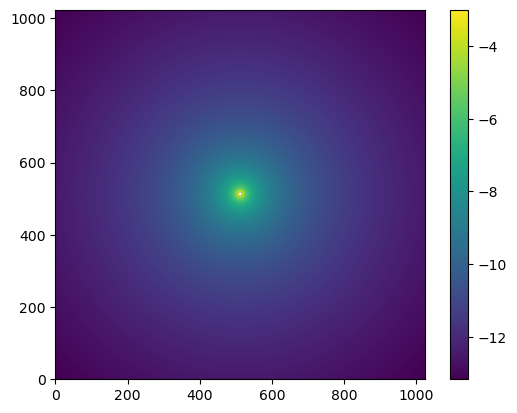

In [ ]:
screenSize = Npix*oversampling
fc = 1/pitch*oversampling

freqMap = spatial_frequency(screenSize=screenSize)
map = get_freq_map(freqMap=freqMap, fc=fc)

plt.figure()
plt.imshow(xp.asnumpy(xp.log(xp.fft.fftshift(map))),origin='lower')
plt.colorbar()

In [35]:
from arte.utils.radial_profile import computeRadialProfile
psd, distance = computeRadialProfile(map,Npix*oversampling//2,Npix*oversampling//2)

IndexError: unsupported iterator index

In [ ]:
pupil = get_circular_mask((screenSize,screenSize),Npix//2)